# 유방암 종양 예측

## 악성 종양인지, 양성 종양(정상)인지 예측

* radius : 반경
* texture : 질감
* perimeter : 둘레
* area : 면적
* smoothness : 매끄러움
* compactness : 조그만 정도
* concavity : 윤곽의 오목함
* concave points : 윤곽의 오목한 부분의 수
* symmetry : 대칭
* fractal dimension : 프랙탈 차원
* target : Malignant-악성 종양 / Benign-양성 종양(정상)
---
* mean ~ : 데이터별 평균 값
* ~ error : 데이터별 표준편차 값
* worst ~ : 데이터별 가장 큰 3개의 평균으로 만든 값

## 데이터셋 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/DrKAI/dataset/main/breast_cancer.csv')

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 데이터 전처리

<details><summary>Hint</summary>

* x, y 구분 필요
* y에 대한 전처리 필요
* 데이터셋 구분 필요

</details>

In [4]:
## 악성 종양 여부가 더 중요한 것이라 생각하여 Malignant를 1로 설정

data.loc[ data['target']=='Malignant' , 'target'] = 1
data.loc[ data['target']=='Benign' , 'target'] = 0

In [5]:
data['target'] = data['target'].astype(float)

In [6]:
x = data.drop(['target'], axis=1)
y = data['target']

In [7]:
x.shape, y.shape

((569, 30), (569,))

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_x, test_x, train_y, test_y \
    = train_test_split(x, y, test_size=0.1, random_state=2022)

In [10]:
train_x.shape, train_y.shape

((512, 30), (512,))

## 모델링

### Locally connected layer를 구성하기 위한 feature 설정

* mean, error, worst를 각 feature별로 묶어 새로운 변수를 만든다.
        ex) mean radius, radius error, worst radius

<details><summary> Hint </summary>

* x의 train 구조와 test 구조는 동일해야 한다.

</details>

In [11]:
tr_radius = train_x.loc[ : , ['mean radius', 'radius error', 'worst radius'] ]
tr_texture = train_x.loc[ : , ['mean texture', 'texture error', 'worst texture'] ]
tr_area = train_x.loc[ : , ['mean area', 'area error', 'worst area'] ]
tr_perimeter = train_x.loc[ : , ['mean perimeter', 'perimeter error', 'worst perimeter'] ]
tr_smoothness = train_x.loc[ : , ['mean smoothness', 'smoothness error', 'worst smoothness'] ]
tr_compactness = train_x.loc[ : , ['mean compactness', 'compactness error', 'worst compactness'] ]
tr_concavity = train_x.loc[ : , ['mean concavity', 'concavity error', 'worst concavity'] ]
tr_con_point = train_x.loc[ : , ['mean concave points', 'concave points error', 'worst concave points'] ]
tr_symmetry = train_x.loc[ : , ['mean symmetry', 'symmetry error', 'worst symmetry'] ]
tr_fractal = train_x.loc[ : , ['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension'] ]

In [12]:
te_radius = test_x.loc[ : , ['mean radius', 'radius error', 'worst radius'] ]
te_texture = test_x.loc[ : , ['mean texture', 'texture error', 'worst texture'] ]
te_area = test_x.loc[ : , ['mean area', 'area error', 'worst area'] ]
te_perimeter = test_x.loc[ : , ['mean perimeter', 'perimeter error', 'worst perimeter'] ]
te_smoothness = test_x.loc[ : , ['mean smoothness', 'smoothness error', 'worst smoothness'] ]
te_compactness = test_x.loc[ : , ['mean compactness', 'compactness error', 'worst compactness'] ]
te_concavity = test_x.loc[ : , ['mean concavity', 'concavity error', 'worst concavity'] ]
te_con_point = test_x.loc[ : , ['mean concave points', 'concave points error', 'worst concave points'] ]
te_symmetry = test_x.loc[ : , ['mean symmetry', 'symmetry error', 'worst symmetry'] ]
te_fractal = test_x.loc[ : , ['mean fractal dimension', 'fractal dimension error', 'worst fractal dimension'] ]

### 모델 코드 작성

1. 윗 단계에서 생성한 변수의 **형태**를 이용하여, 각 변수별 input layer를 만든다.
2. node가 12개인 hidden layer를 **각각** 생성하여, 각 input layer와 연결한다.
3. 생성된 hidden layer를 add 한다.
---
4. 전체 변수를 이용한 input layer를 만든다.
5. 3번 단계로 add 된 레이어와 4번 단계로 만들어진 input layer를 concat한다.
---
6. node가 128개인 hidden layer를 5번 단계로 concat된 레이어와 연결한다.
7. output layer를 생성하고 compile 한다.

In [16]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add, Concatenate

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [17]:
# 1번. 세션 클리어
keras.backend.clear_session()

# 2번. 모델의 레이어를 엮기!
il_full = Input(shape=(30,))

il_rad = Input(shape=(3,))
hl_rad = Dense(12, activation='relu')(il_rad)

il_tex = Input(shape=(3,))
hl_tex = Dense(12, activation='relu')(il_tex)

il_peri = Input(shape=(3,))
hl_peri = Dense(12, activation='relu')(il_peri)

il_area = Input(shape=(3,))
hl_area = Dense(12, activation='relu')(il_area)

il_smoo = Input(shape=(3,))
hl_smoo = Dense(12, activation='relu')(il_smoo)

il_com = Input(shape=(3,))
hl_com = Dense(12, activation='relu')(il_com)

il_con = Input(shape=(3,))
hl_con = Dense(12, activation='relu')(il_con)

il_conp = Input(shape=(3,))
hl_conp = Dense(12, activation='relu')(il_conp)

il_sym = Input(shape=(3,))
hl_sym = Dense(12, activation='relu')(il_sym)

il_frac = Input(shape=(3,))
hl_frac = Dense(12, activation='relu')(il_frac)

hl_add = Add()([hl_rad, hl_tex, hl_peri, hl_area, hl_smoo,
                hl_com, hl_con, hl_conp, hl_sym, hl_frac])

hl_concat = Concatenate()([il_full, hl_add])
hl_dense = Dense(128, activation='relu')(hl_concat)
ol = Dense(1, activation='sigmoid')(hl_dense)

input_list = [il_full, il_rad, il_tex, il_peri, il_area,
              il_smoo, il_com, il_con, il_conp, il_sym, il_frac]
model = Model(input_list, ol)

model.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'],
              optimizer=keras.optimizers.Adam(0.001) )

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 3)]          0           []                               
                                                                                              

### 모델 구조 시각화

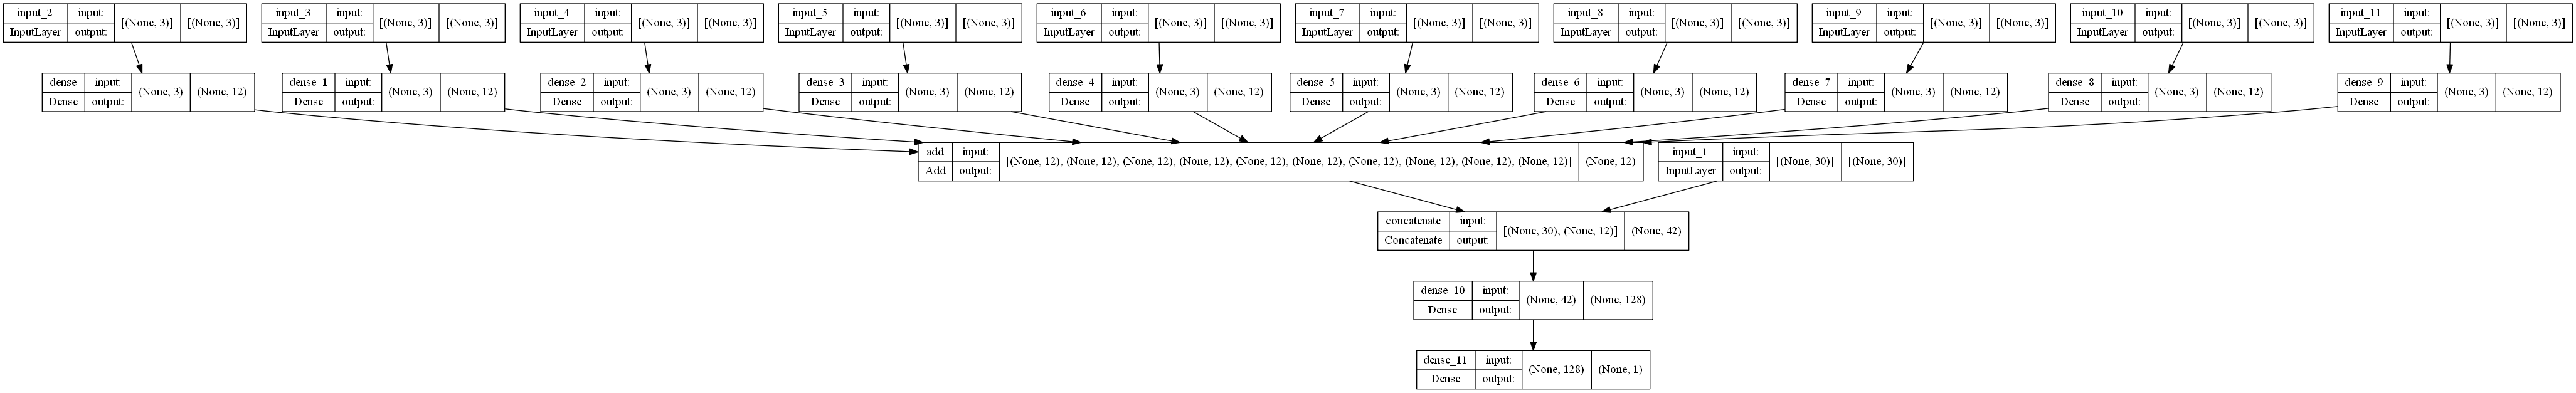

In [18]:
plot_model(model, show_shapes=True)

### 모델 학습

In [19]:
tr_list = [train_x, tr_radius, tr_texture,
           tr_perimeter, tr_area,
           tr_smoothness, tr_compactness,
           tr_concavity, tr_con_point, 
           tr_symmetry, tr_fractal]

In [20]:
te_list = [test_x, te_radius, te_texture,
           te_perimeter, te_area,
           te_smoothness, te_compactness,
           te_concavity, te_con_point, 
           te_symmetry, te_fractal]

In [21]:
model.fit( tr_list, train_y, validation_split=1/9, verbose=1, epochs=25)

Epoch 1/25
15/15 [==============================] - 2s 34ms/step - loss: 32.4928 - accuracy: 0.4659 - val_loss: 6.1043 - val_accuracy: 0.7719
Epoch 2/25
15/15 [==============================] - 0s 4ms/step - loss: 4.5355 - accuracy: 0.6110 - val_loss: 0.9279 - val_accuracy: 0.7018
Epoch 3/25
15/15 [==============================] - 0s 4ms/step - loss: 2.3836 - accuracy: 0.7055 - val_loss: 0.3043 - val_accuracy: 0.8772
Epoch 4/25
15/15 [==============================] - 0s 5ms/step - loss: 0.9597 - accuracy: 0.8527 - val_loss: 0.1679 - val_accuracy: 0.9825
Epoch 5/25
15/15 [==============================] - 0s 5ms/step - loss: 0.4788 - accuracy: 0.9055 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 6/25
15/15 [==============================] - 0s 5ms/step - loss: 0.5000 - accuracy: 0.9077 - val_loss: 0.0207 - val_accuracy: 0.9825
Epoch 7/25
15/15 [==============================] - 0s 5ms/step - loss: 0.2601 - accuracy: 0.9187 - val_loss: 0.5162 - val_accuracy: 0.7895
Epoch 8/25
15/15 [

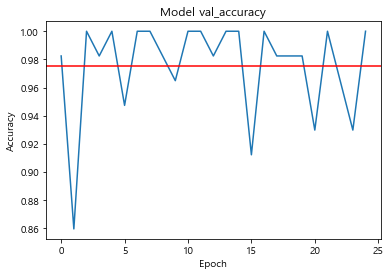

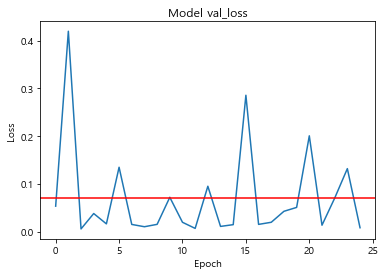

In [45]:
# 6 훈련 과정 시각화 (정확도)
history = model.fit( tr_list, train_y, validation_split=1/9, verbose=1, epochs=25)
import numpy as np
plt.plot(history.history['val_accuracy'])
plt.title('Model val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.axhline(np.mean(history.history['val_accuracy']), color='red')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['val_loss'])
plt.title('Model val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.axhline(np.mean(history.history['val_loss']), color='red')
plt.show()

### 모델 예측

In [22]:
pred_y = model.predict(te_list)

pred_y[:11].reshape(-1)

array([7.1110636e-02, 7.2419643e-04, 7.2382575e-01, 9.0122521e-03,
       4.5972764e-02, 5.9184730e-03, 9.9908733e-01, 1.0000000e+00,
       9.9822754e-01, 1.0000000e+00, 1.0000000e+00], dtype=float32)

In [23]:
for idx, val in enumerate(pred_y) :
    if pred_y[idx] >= 0.5 :
        pred_y[idx] = 1
    else :
        pred_y[idx] = 0

In [24]:
pred_y[:11].reshape(-1)

array([0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)

## 평가

1. 모델의 정확도를 확인하시오.
2. 악성이라 예측한 것 중 실제 악성으로 나온 비율을 구하시오.
3. 실제 악성 중 모델이 악성이라 예측한 것의 비율을 구하시오.
4. 정상이라 예측한 것 중 실제 정상으로 나온 비율을 구하시오.

### 모델 평가

In [ ]:
model.evaluate(te_list, test_y)

In [ ]:
for idx, val in enumerate(pred_y) :
    if pred_y[idx] >= 0.5 :
        pred_y[idx] = 1
    else :
        pred_y[idx] = 0

In [ ]:
pred_y[:11].reshape(-1)

### classification_report

In [25]:
from sklearn.metrics import classification_report

In [26]:
print( classification_report(test_y, pred_y, target_names=['Benign' , 'Malignant']) )

              precision    recall  f1-score   support

      Benign       1.00      0.82      0.90        33
   Malignant       0.80      1.00      0.89        24

    accuracy                           0.89        57
   macro avg       0.90      0.91      0.89        57
weighted avg       0.92      0.89      0.90        57



In [ ]:
## 1. 정확도 : 91%
## 2. Malignant precision : 100%
## 3. Malignant recall : 79% <- 의료 사고
## 4. Benign precision : 87% <- 영화 '아는 여자'